In [1]:
#student marks preduction on the basis of study hours

In [2]:
ls

Introduction to R.pdf
SQL-Cheat-Sheet.pdf
calculator.py
drive-download-20210613T112140Z-001.zip
first_ml_project.ipynb
info.mohitrohilla.pdf
linear algebra.pdf
new_calculator.py
pratice.R
startup_idea.pdf*
statistics.pdf
student_info.csv


In [3]:
import numpy as np

In [4]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
#load data

In [8]:
df = pd.read_csv("student_info.csv")

In [9]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [10]:
df.shape

(200, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [14]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


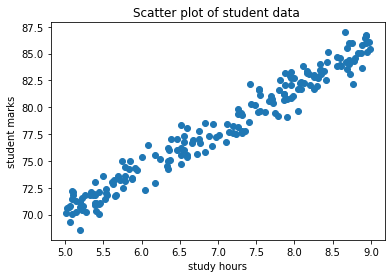

In [16]:
plt.scatter(x = df.study_hours,y = df.student_marks)
plt.xlabel("study hours")
plt.ylabel("student marks")
plt.title("Scatter plot of student data ")
plt.show()

In [17]:
#prepare the data for machine learning algo

In [18]:
#data cleaning

In [20]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [21]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [22]:
df2 = df.fillna(df.mean())

In [23]:
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [24]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [25]:
#split data set

In [32]:
X = df2.drop('student_marks' , axis = 'columns')
y = df2.drop('study_hours' , axis = 'columns')

In [33]:
X.shape

(200, 1)

In [34]:
y.shape

(200, 1)

In [35]:
#sklearn

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train , X_test , y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state = 51)

In [39]:
X_train.shape

(160, 1)

In [40]:
X_test.shape

(40, 1)

In [42]:
y_train.shape

(160, 1)

In [43]:
y_test.shape

(40, 1)

In [44]:
#we will use linear regression, Equation :-> Y = m * x + c

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
lr.coef_

array([[3.93571802]])

In [52]:
lr.intercept_

array([50.44735504])

In [55]:
lr.predict([[4]])[0][0].round(2)

66.19

In [56]:
y_predict = lr.predict(X_test)

In [57]:
y_predict

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [60]:
df3 = pd.DataFrame(np.c_[X_test, y_test , y_predict], columns = ["study hours","studnet marks","prediction"])

In [61]:
df3

,study hours,studnet marks,prediction
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [ ]:
#check the model accuracy

In [62]:
lr.score(X_test, y_test)

0.9514124242154466

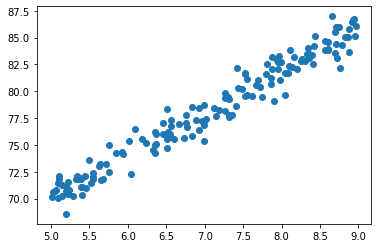

In [63]:
plt.scatter(X_train,y_train)

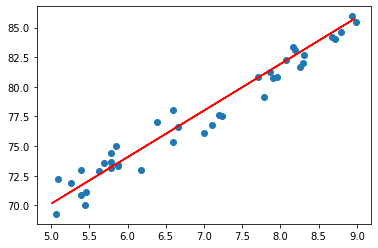

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_train , lr.predict(X_train), color = 'r')

In [68]:
# to save model

In [69]:
import joblib
joblib.dump(lr, "student_marks_preduction_ml_model.pkl")

['student_marks_preduction_ml_model.pkl']

In [ ]:
#load model

In [70]:
model = joblib.load("student_marks_preduction_ml_model.pkl")

In [73]:
model.predict([[4]])[0][0].round(5)

66.19023